In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('C:\\Users\\sdevelop\\Desktop\\horse.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

In [4]:
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

In [5]:
dst = cv2.dilate(dst, None)

In [6]:
img_corners = img_rgb.copy()


In [7]:
img_corners[dst > 0.01 * dst.max()] = [0, 255, 0]

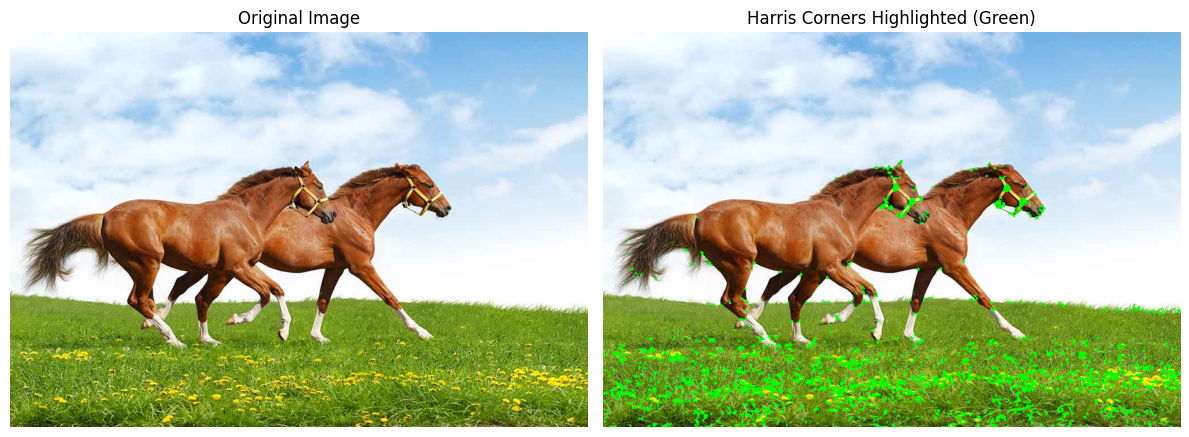

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_corners)
plt.title('Harris Corners Highlighted (Green)')
plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
if img is None: raise ValueError("Image not found.")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
plt.figure(figsize=(10, 4))


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

(-0.5, 1023.5, 699.5, -0.5)

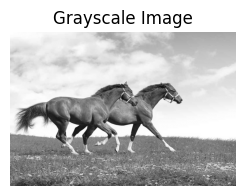

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')


In [12]:
for c in cv2.goodFeaturesToTrack(gray, 100, 0.01, 10).astype(int):
    x, y = c.ravel()
    cv2.circle(img, (x, y), 5, (0, 255, 0), -1)

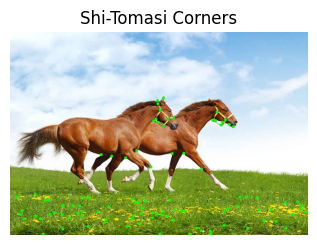

In [13]:
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners')
plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
img1 = cv2.imread("C:\\Users\\sdevelop\\Desktop\\horse.jpg", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)


In [15]:
img2 = cv2.imread("C:\\Users\\sdevelop\\Desktop\\horse.jpg", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


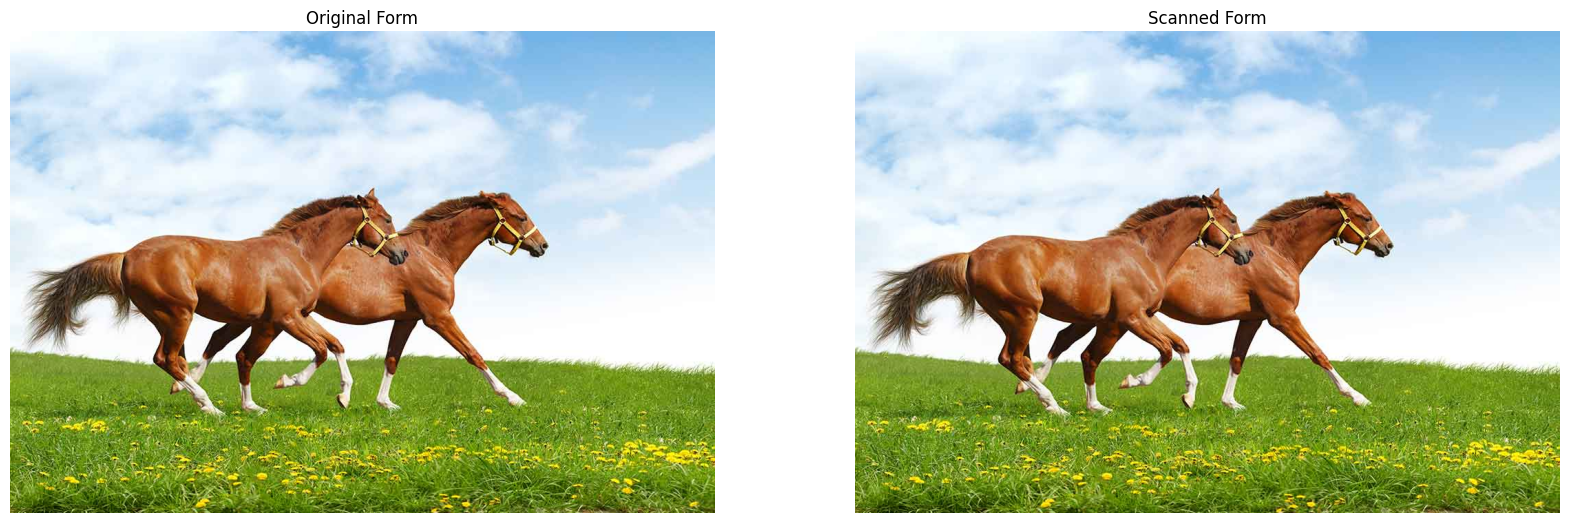

In [16]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Original Form")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Scanned Form")
plt.axis("off")
plt.show()

In [17]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


In [18]:
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(img1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2_gray, None)

In [19]:
img1_display = cv2.drawKeypoints(img1, keypoints1,
outImage = np.array([]),
color = (255, 0, 0),
flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_display = cv2.drawKeypoints(img2, keypoints2,
outImage = np.array([]),
color = (255, 0, 0),
flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

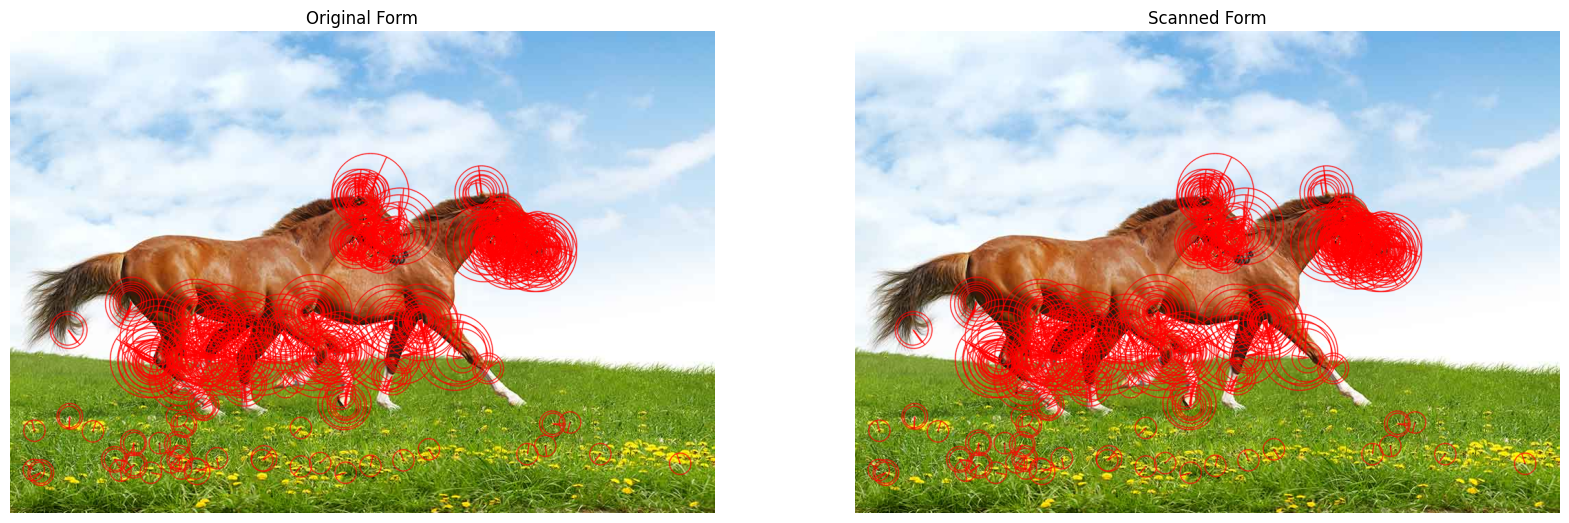

In [20]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img1_display)
plt.title("Original Form")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img2_display)
plt.title("Scanned Form")
plt.show()


In [21]:
matcher =cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

In [22]:
matches = list(matcher.match(descriptors1, descriptors2, None))


In [23]:
matches.sort(key = lambda x: x.distance, reverse = False)

numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

im_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None)


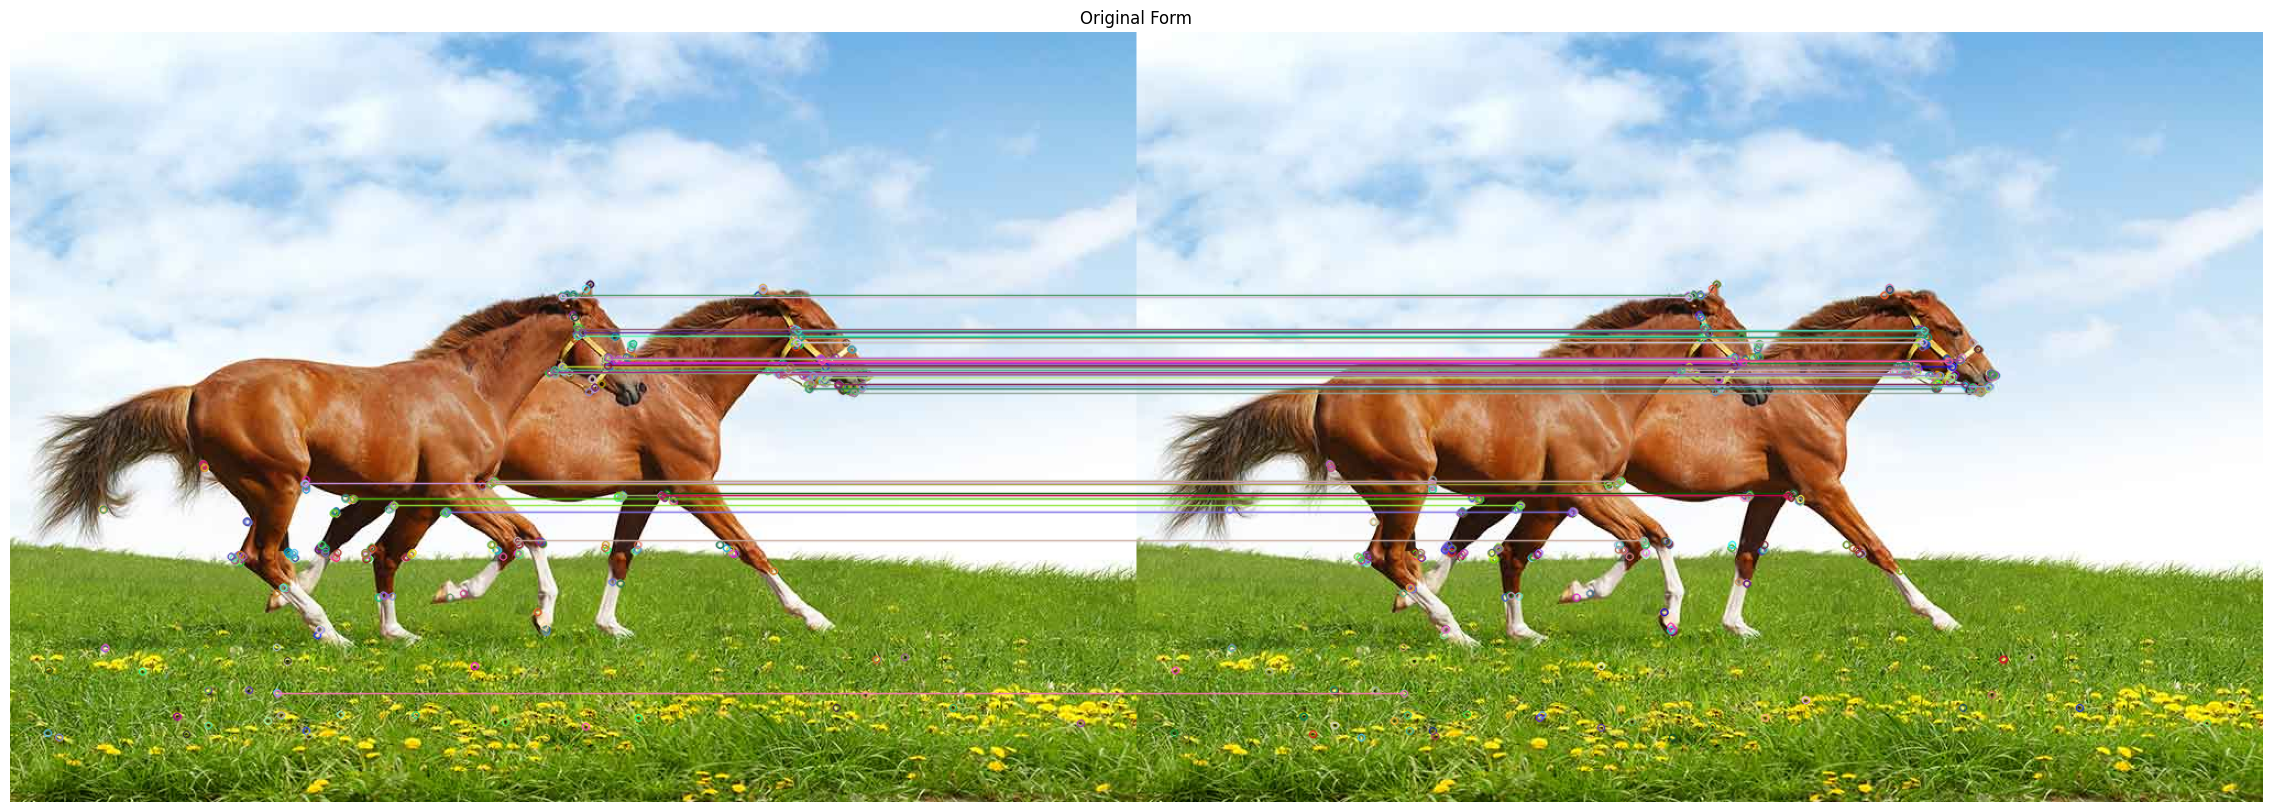

In [24]:
plt.figure(figsize = [40, 10])
plt.imshow(im_matches)
plt.axis("off")
plt.title("Original Form")
plt.show()
